In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("car_age_price.csv")

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [5]:
data.shape

(112, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [7]:
#find missing values

In [8]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

In [9]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


# Correlation

<AxesSubplot:>

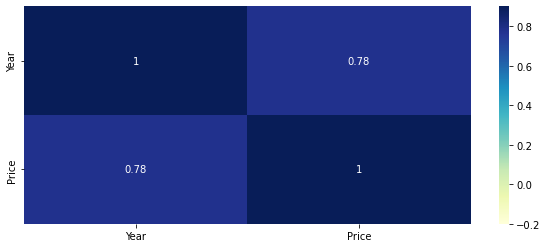

In [10]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=-0.2,vmax=0.9,annot=True,cmap='YlGnBu')

In [11]:
data.columns

Index(['Year', 'Price'], dtype='object')

# Splitting the data and target

In [12]:
y=data['Price']
x=data.drop(['Price'],axis=1)


In [13]:
print(x)

     Year
0    2018
1    2019
2    2019
3    2018
4    2018
..    ...
107  2016
108  2014
109  2015
110  2016
111  2015

[112 rows x 1 columns]


In [14]:
print(y)

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64


# splitting Training and Test data

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# Model Training

In [16]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [17]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [18]:
predictions

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [19]:
from sklearn.metrics import mean_squared_error,r2_score

In [20]:
print('Mean Squared Error is:', mean_squared_error(y_test,predictions)) 
print('R Squared value is:',r2_score(y_test,predictions))

Mean Squared Error is: 4326906256.829671
R Squared value is: 0.36759313425902185


# visualization

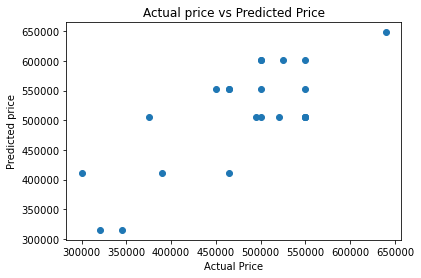

In [21]:
plt.scatter(y_test,predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted Price")
plt.show()

# Lasso Regression

In [22]:
##splitting Training and Test data

In [23]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [24]:
x_train.shape

(89, 1)

In [25]:
y_train.shape

(89,)

In [26]:
##Model Training

In [27]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0)
lasso.fit(x_train,y_train)

Lasso()

In [28]:
y_pred1=lasso.predict(x_test)

In [29]:
x_test

,Year
40,2019
65,2017
4,2018
47,2018
42,2018
69,2015
26,2017
11,2018
10,2019
44,2019


In [30]:
y_pred1

array([600774.90747294, 505558.59627394, 553166.75187345, 553166.75187345,
       553166.75187345, 410342.28507493, 505558.59627394, 553166.75187345,
       600774.90747294, 600774.90747294, 315125.97387594, 505558.59627394,
       410342.28507493, 648383.06307244, 553166.75187345, 600774.90747294,
       315125.97387594, 410342.28507493, 505558.59627394, 505558.59627394,
       505558.59627394, 505558.59627394, 505558.59627394])

In [31]:
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)

Mean squared error on test set 4326859771.015669


In [32]:
print('R Squared value is:',r2_score(y_test,y_pred1))

R Squared value is: 0.3675999284778446


In [33]:
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

In [34]:
print(lasso_coeff)

  Columns  Coefficient Estimate
0    Year            47608.1556


In [35]:
##Visualization

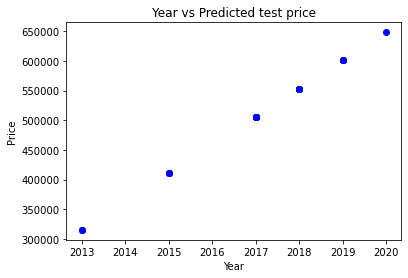

In [36]:
plt.scatter( x_test, y_pred1 ,color='blue')
          
plt.title( 'Year vs Predicted test price' )
      
plt.xlabel( 'Year' )
plt.ylabel( 'Price' )
      
plt.show()